#### Atividade Fuzzy

Imagine que um fazendeiro planeja contratar um técnico para que ele automatize o sistema de irrigação de sua fazenda.

<br>
<img src='images/fazenda.jpg' width= 500px>

Este técnico planeja utilizar sistemas fuzzy para isso.

Para isso é importante levar em consideração 2 fatores para a construção desse modelo, a **umidade do solo** e a **temperatura do ar**.
Com isso, será possível usar um sistema fuzzy para saber a **duração da irrigação.**


#### Funções de Pertinência

##### Antecedentes

<img src='images/umidade.png' width= 300px>
<img src='images/temperatura.png'width= 300px>

##### Consequentes

<img src='images/duracao.png' width= 300px>

##### Construa o sistema que o técnico imaginou

#### Criando antescedentes (entrada/input)

In [2]:
# Imports
%pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Definindo universo de discurso e nome da variável
universo_umidade = np.arange(0, 101)
universo_temperatura = np.arange(0, 41)

umidade = control.Antecedent(universe = universo_umidade, label = "umidade")
temperatura = control.Antecedent(universe = universo_temperatura, label = "temperatura")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
umidade["baixa"] = fuzzy.trapmf(umidade.universe, [0, 0, 20, 40])
umidade["media"] = fuzzy.trimf(umidade.universe, [30, 50, 70])
umidade["alta"] = fuzzy.trapmf(umidade.universe, [60, 80, 100, 100])

temperatura["baixa"] = fuzzy.trapmf(temperatura.universe, [0, 0, 10, 20])
temperatura["media"] = fuzzy.trimf(temperatura.universe, [15, 25, 35])
temperatura["alta"] = fuzzy.trapmf(temperatura.universe, [30,33, 40, 40])

#### Criando consequent (saída/output)

/opt/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


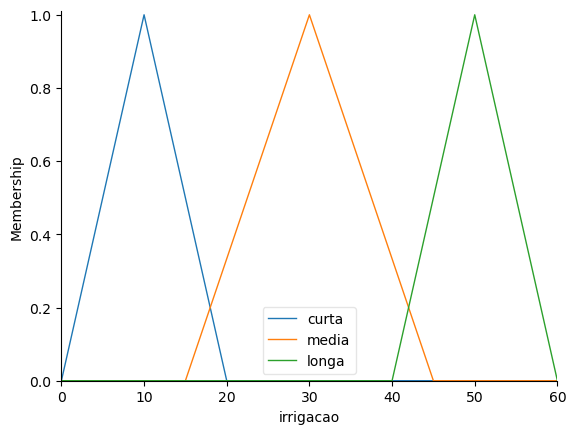

In [4]:
# Universo irrigacao
universo_irrigacao = np.arange(0, 61)

irrigacao = control.Consequent(universe = universo_irrigacao, label = "irrigacao")

irrigacao["curta"] = fuzzy.trimf(irrigacao.universe, [0, 10, 20])
irrigacao["media"] = fuzzy.trimf(irrigacao.universe, [15, 30, 45])
irrigacao["longa"] = fuzzy.trimf(irrigacao.universe, [40, 50, 60])

irrigacao.view()

#### Criando regras

#### Conjunto de regras

O técnico montou um conjunto de regras para fazer a inferência de seu sistema:

    Se a umidade do solo é baixa e a temperatura do ar é baixa, então a duração da irrigação deve ser média.

    Se a umidade do solo é baixa e a temperatura do ar é média, então a duração da irrigação deve ser longa.

    Se a umidade do solo é baixa e a temperatura do ar é alta, então a duração da irrigação deve ser longa.

    Se a umidade do solo é média e a temperatura do ar é baixa, então a duração da irrigação deve ser curta.

    Se a umidade do solo é média e a temperatura do ar é média, então a duração da irrigação deve ser média.

    Se a umidade do solo é média e a temperatura do ar é alta, então a duração da irrigação deve ser longa.

    Se a umidade do solo é alta e a temperatura do ar é baixa, então a duração da irrigação deve ser curta.

    Se a umidade do solo é alta e a temperatura do ar é média, então a duração da irrigação deve ser curta.

    Se a umidade do solo é alta e a temperatura do ar é alta, então a duração da irrigação deve ser média.

In [5]:
# Regras
regra1 = control.Rule(umidade["baixa"] & temperatura["baixa"], irrigacao["media"])
regra2 = control.Rule(umidade['baixa'] & temperatura['media'], irrigacao['longa'])
regra3 = control.Rule(umidade['baixa'] & temperatura['alta'], irrigacao['longa'])
regra4 = control.Rule(umidade['media'] & temperatura['baixa'], irrigacao['curta'])
regra5 = control.Rule(umidade['media'] & temperatura['media'], irrigacao['media'])
regra6 = control.Rule(umidade['media'] & temperatura['alta'], irrigacao['longa'])
regra7 = control.Rule(umidade['alta'] & temperatura['baixa'], irrigacao['curta'])
regra8 = control.Rule(umidade['alta'] & temperatura['media'], irrigacao['curta'])
regra9 = control.Rule(umidade['alta'] & temperatura['alta'], irrigacao['media'])

#### Criando sistema

In [6]:
# Adicionando regras ao controle
irrigacao_controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

# Criando sistema com o controle de irrigacao
sistema = control.ControlSystemSimulation(irrigacao_controle)

Resultado 'desfuzzificado': 30.0


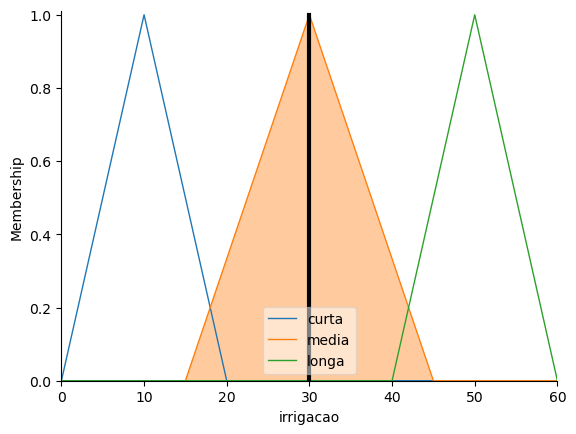

In [7]:
# Test 1
sistema.input["umidade"] = 50
sistema.input["temperatura"] = 25

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['irrigacao']}")

irrigacao.view(sim = sistema)

Resultado 'desfuzzificado': 9.999999999999996


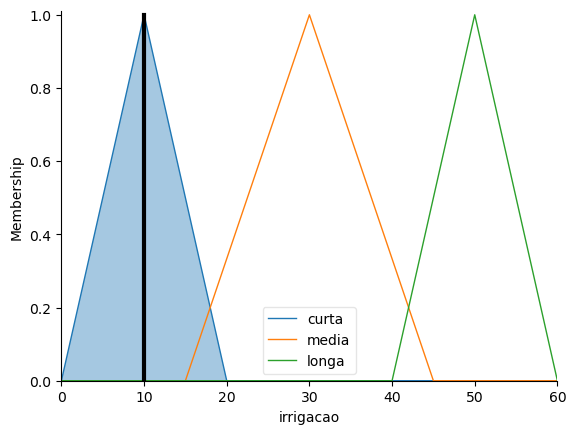

In [8]:
# Test 2
sistema.input["umidade"] = 90
sistema.input["temperatura"] = 5

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['irrigacao']}")

irrigacao.view(sim = sistema)

Resultado 'desfuzzificado': 49.999999999999986


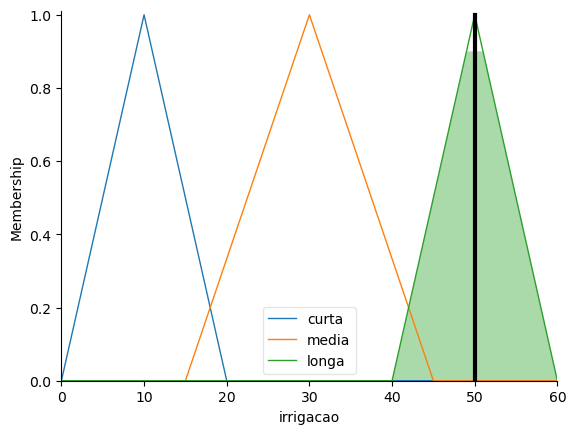

In [9]:
# Test 3
sistema.input["umidade"] = 22
sistema.input["temperatura"] = 38

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['irrigacao']}")

irrigacao.view(sim = sistema)

Resultado 'desfuzzificado': 49.99999999999999


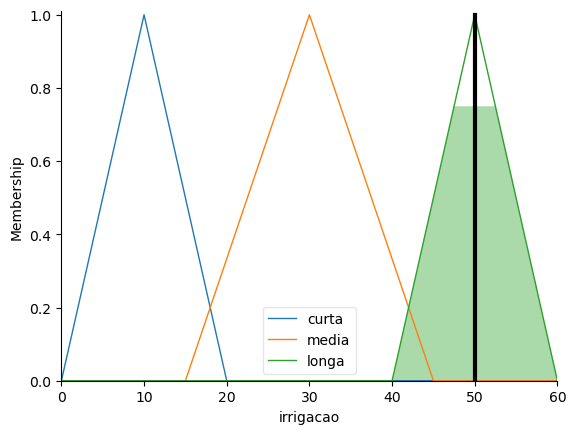

In [10]:
# Test 4
sistema.input["umidade"] = 55
sistema.input["temperatura"] = 39

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['irrigacao']}")

irrigacao.view(sim = sistema)